# Thoery Part

# K Means clustering Algorithm

ML alg are categorized into 3 main categories:
1. Supervised learning
2. Unsupervised learning
3. Reinforcment learning

So far we have covered supervised learning where in the given dataset we have our class label or a target variable present.

In unsupervised learning all we have is set of features, we dont know about our target variable or  class label. Using this dataset, we try to identify the underlying structure in that data or we sometimes try to find the clusters in that data and we can make useful predictions out of it. K-means is a very popular clustering algorithm.

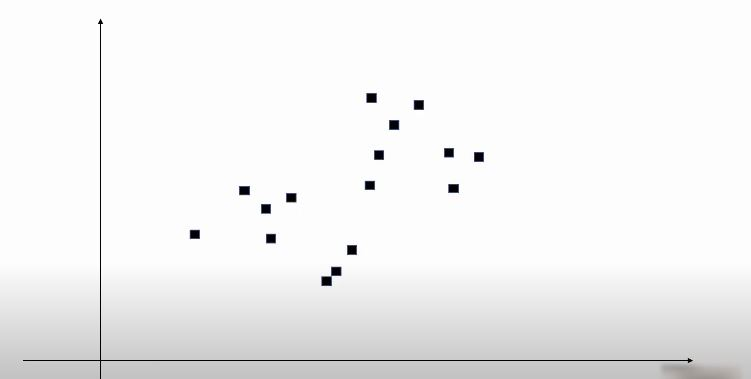

Lets say we have a dataset like this where x and y represents the 2 different features and you want to identify clusters in this dataset. Now when the dataset is given to you, then you dont have any information on target variables, you dont know what you are looking for. All you are trying to do is to identify some structure into it and oneway of looking into this is these two clusters:

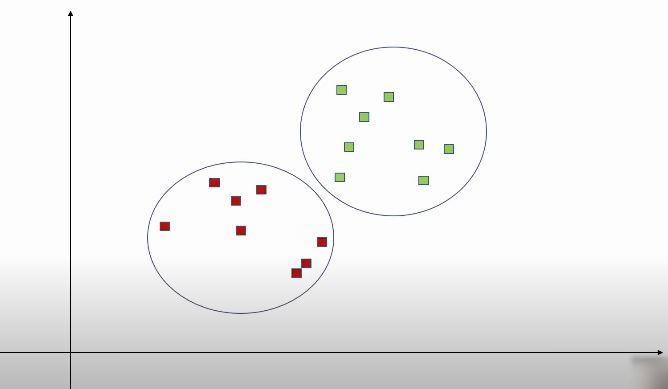

Just by visual examination we can say that this dataset has these 2 clusters and k-means helps you identify these clusters now k-in-k-means is a free parameter wherein before you start the algorithm you have to tell the algorithm what is the value of k that you are looking for. Here K = 2.

Lets say we have a dataset this dataset you start with k = 2 and the first step is to identify 2 random points which you consider as the center of those 2 clusters we called them centroids as well so just put 2 random points here if your k was suppose 3 then you will put 3 random points and these could be places anywhere in this 2D place

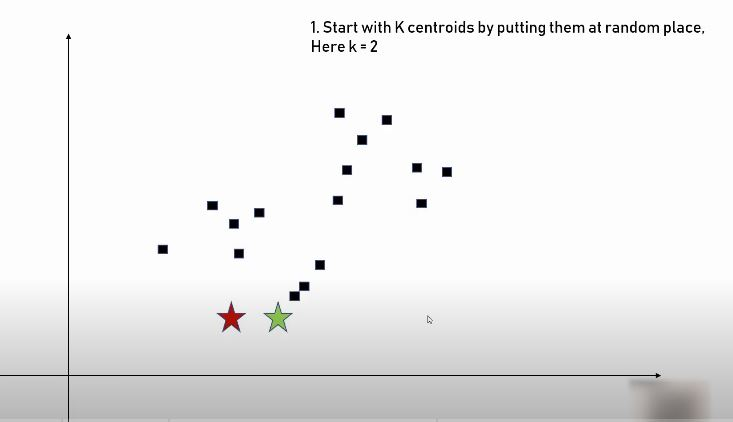

Next step is to identify the distance of each of these datapoints from these centroids eg. this datapoint the left one is more near to the red one centroid hence we'll say it belongs to the red cluster where as other datapoint is near to the green centroid so that belongs to the green cluster.

The simple mathematical way to identify the distance is to draw a line, connecting the line between those 2 centroids and then draw a perpendicular line anything on the left hand side is red cluster and on right hand side is green cluster:

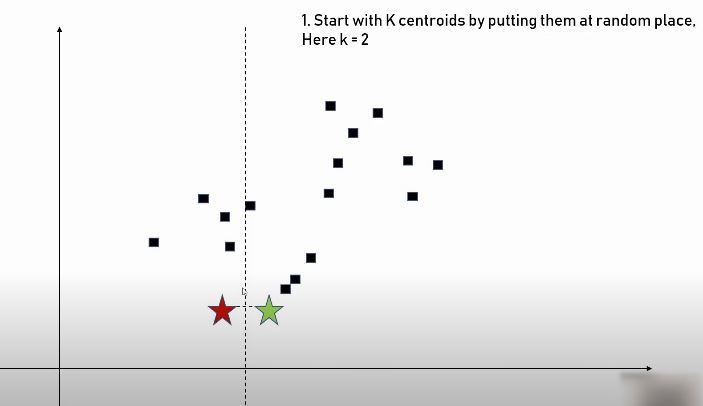

Therefore, we now already have our 2 imperfect clunky cluster:

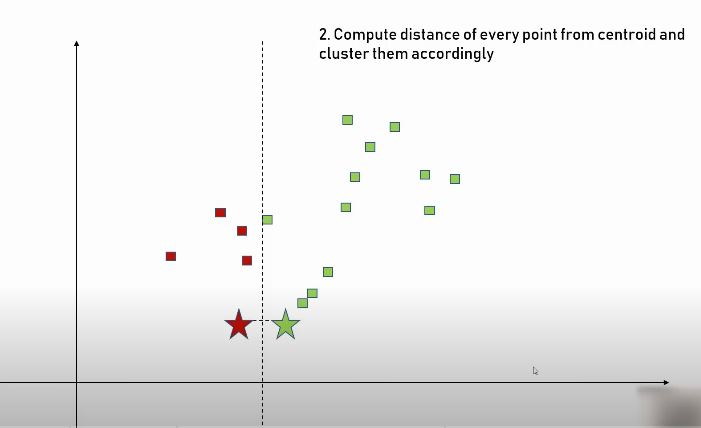

and now we try to improve these clusters. We only got our 2 clusters, now we will make them better and better at every stage and the way you do that is that you will try to adjust the centroid centroids for these 2 clusters eg. for that red cluster which are that 4 datapoints we will try to find the center of gravity almost and we will put the red center there and we will do the same thing for green one so we get this when we make adjustments:

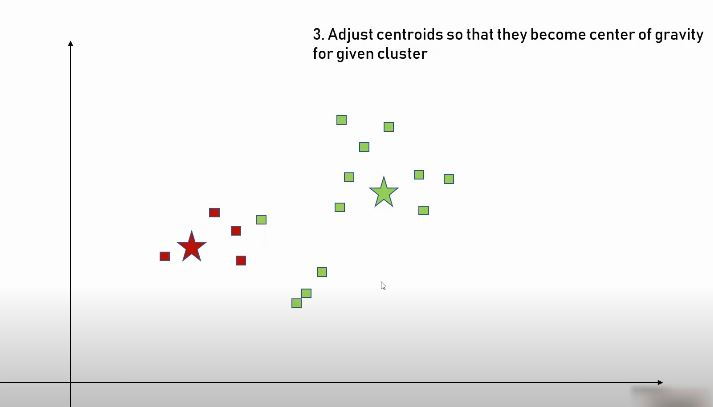

Now we will repeat the same process again. Again we recompute the distance of each of these points from these centroids and then if the points is more near to red then you put it in a red cluster otherwise you put them in a green cluster, so we repeat the same method:

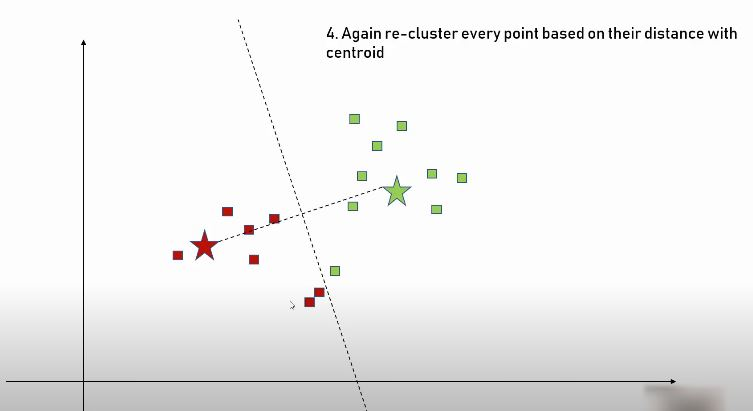

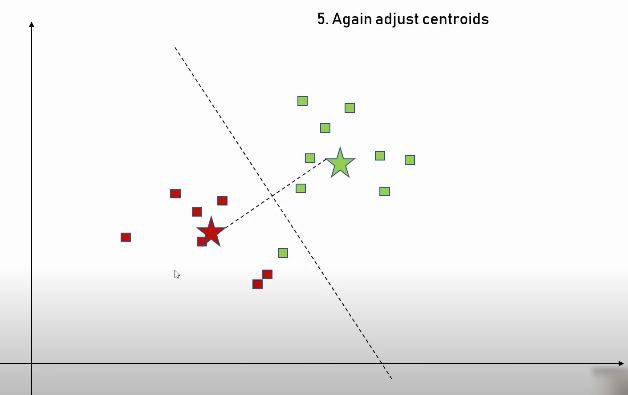

We keep on repeating this process, we just recalculate our centroids then recalculate the distance of each individual data point from these centroids and readjust the clusters until the point that none of the data points change the cluster so in that figure here is only one green which is changing its cluster so now its in red:

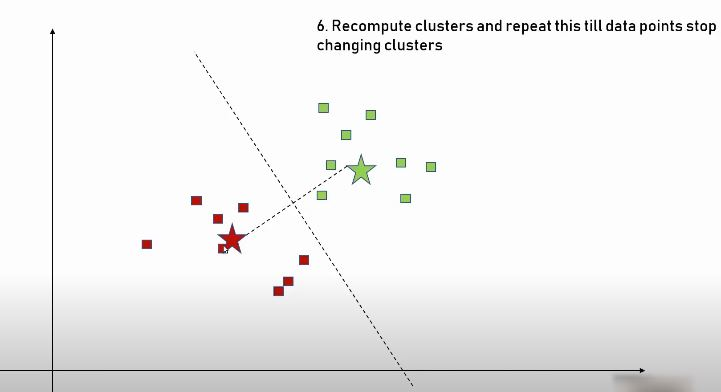

After this we are done even if we try to recompute everything none of these datapoints will change thier position hence we can say that this is final.

So these are now our final clusters:

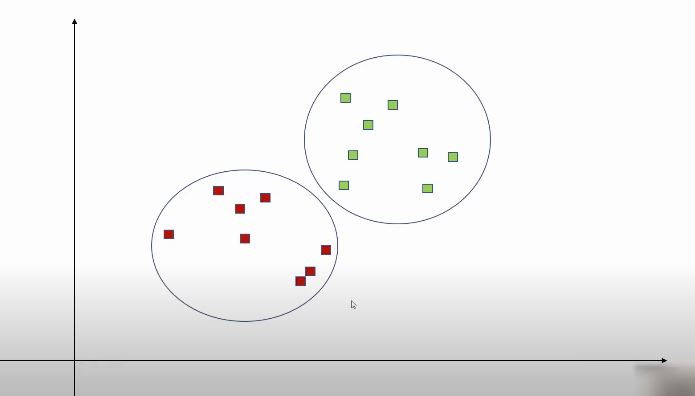

The most important point here is we need to supply K to our algorith but what is a good number on k beacuse here we have 2D space in reality we will have so many features and it is hard to visualize that data on a scatter plot so in which case should we start with:

There is a technique called **Elbow method** (How to determine the correct no. of clusters[K]?)

First we have to look the 1st figure dataset in which we imagine 2 clusters but someone might say that no these are 4 clusters and 3rd person might say they are actually 6 clusters, so different people might interpret these things in a different way and our job is to find out the best possible K numbers.

Example figure:

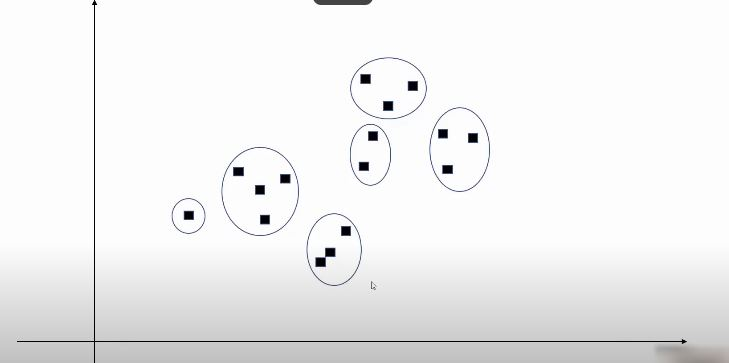

So that finding the best way is called Elbow method and the way that method works is you start with some K so lets say we start with k=2 and we try to compute sum of square error what it means is for each of the cluster you try to compute the distance of the individual data points from the centroid and then you square it and then sum it up so for this cluster we got an equation as shown:

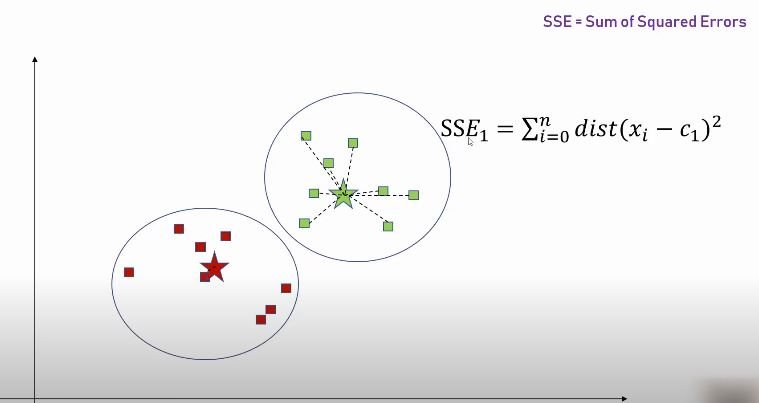

Similarly for the 2nd cluster we will get error no.2  and we do that for  all the clusters and in the end we get the total sum of squared errors:

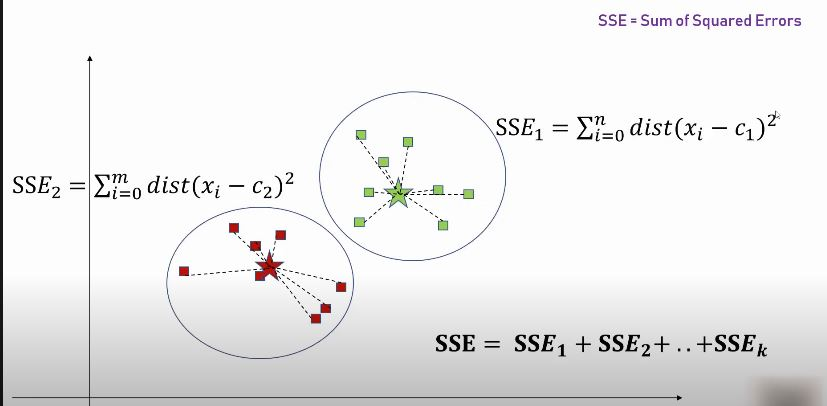

We do square just to handle negative values there is nothing more that. We compute SSE for k=2, we repeat the same procedure for k=3 k=4 and so on... and once we have that number we draw plot like this:

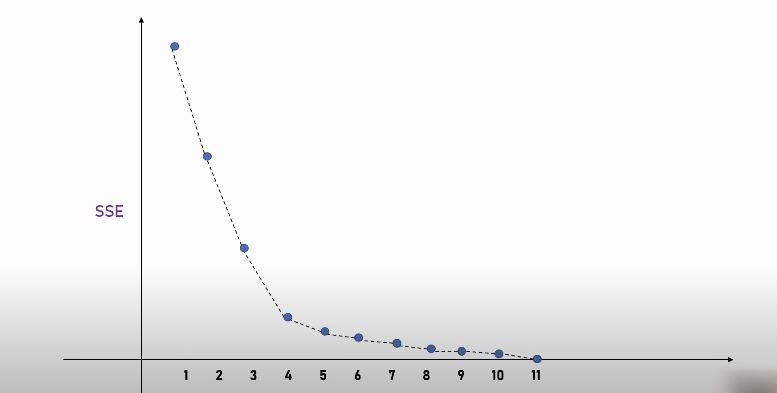

Here we have k going on X axis from 1-11 and on y_axis we have sum of square error. We will realize that as we increase the number of clusters it will decrease the error. Its kind of intuitive as at somepoint we can consider all our datapoints as one cluster individual where your sum of square error becomes almost zero.

Assume we have only 11 data points and at 11 value of k the error will become 0. The general guideline is to find out an elbow so the albow is on this chart:

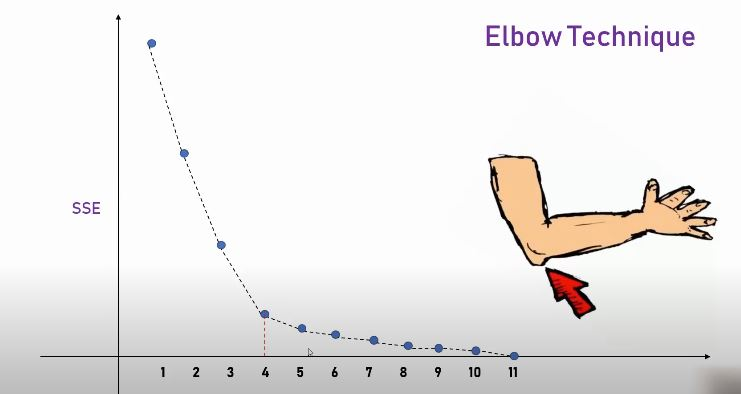

The line drawn at 4 is short of like an elbow so here is a good cluster number so whatever a dataset this chart is representing, a good k number  would be 4 so that was an elbow technique

# Coding Part

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('13_income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


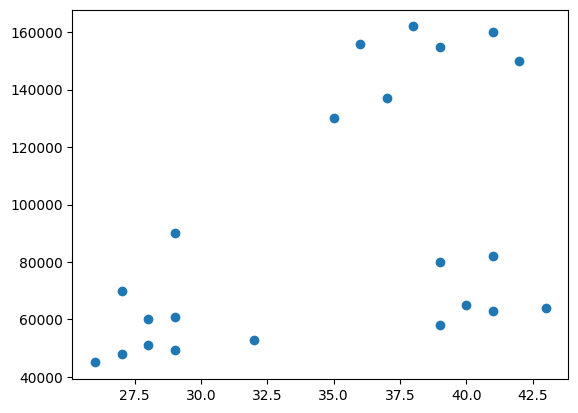

In [4]:
plt.scatter(df['Age'],df['Income($)'])

In [5]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [6]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [9]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


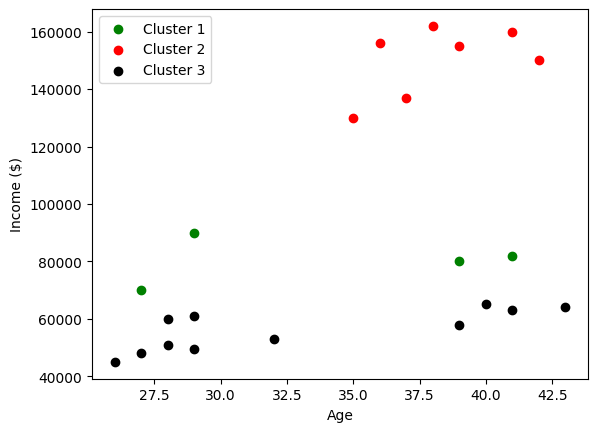

In [15]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'],color='green', label='Cluster 1')
plt.scatter(df2.Age, df2['Income($)'],color='red', label='Cluster 2')
plt.scatter(df3.Age, df3['Income($)'],color='black', label='Cluster 3')

# plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='+', label='centroid')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [21]:
# preprocessing_ min_max Scalar

scalar = MinMaxScaler()
scalar.fit(df[['Income($)']])
df['Income($)'] = scalar.transform(df[['Income($)']])

scalar.fit(df[['Age']])
df['Age'] = scalar.transform(df[['Age']])

df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [22]:
# k_means algorithm model training

km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [23]:
df['cluster'] = y_predicted
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [26]:
# centroids
# x and y axis
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

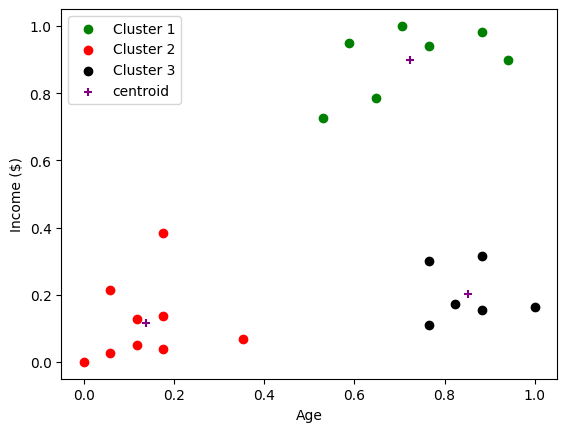

In [27]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'],color='green', label='Cluster 1')
plt.scatter(df2.Age, df2['Income($)'],color='red', label='Cluster 2')
plt.scatter(df3.Age, df3['Income($)'],color='black', label='Cluster 3')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='+', label='centroid')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [29]:
# Elbow plot method

k_rng = range(1,10)
sse=[]
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

# Inertia is the inherent property of a body that makes it oppose any force that would cause a change in its motion

# K-Means: Inertia
# It is calculated by measuring the distance between each data point and its centroid, 
# squaring this distance, and summing these squares across one cluste

In [30]:
sse

[5.434011511988176,
 2.091136388699076,
 0.4750783498553094,
 0.4201552205731442,
 0.3071350418475291,
 0.2582110781621695,
 0.21005328725621214,
 0.13706529523670863,
 0.12738829799021145]

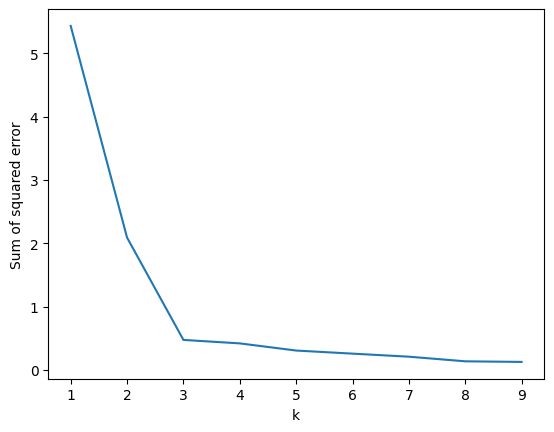

In [31]:
plt.xlabel('k')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)